In [2]:
import gensim
from gensim.utils import simple_preprocess
import nltk
import pandas as pd
from wordcloud import WordCloud
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# View all columns
pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'gensim'

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./../combine_sr.csv')
df.head(5)

/home/nusintern/anaconda3/envs/cornerstone/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,F5_SLM_Indicator,SR_Number,Abstract,F5_Product_Description,Status,Area,Sub_Status,F5_Product,F5_Platform,Sub_Area,...,Email - Inbound,Research,"Problem, Analysis, Resolution",Call - Inbound,Manager Review,Mentor Review,SRT Mentor,RCA,Processed_Abstract,Processed_PAR
0,SLM Met,C3134712,7255 chassis has power but will not power back on,"EOS (19_10_01), BIG-IP 7055, WHITETHORNE 2U, A...",Closed,Configuration,Closed,BIG-IP APM,"F5-BIG-LTM-7255V, D110",APM-AAA,...,"['From: Nick.Volonakis@voya.com\nTo: ""c.emailc...",['You can follow the next article. Please let ...,['Problem Specification: 7255 chassis has powe...,NaN,NaN,NaN,NaN,NaN,chassis power power,problem specification chassis power power big ...
1,FR set after SLM Met,C3142146,BIG-IP became Offline status after confg sync....,"EOS (18_04_01), BIG-IP, 2000 AC PLATFORM, STRA...",Closed,Software,Closed,BIG-IP ASM,"F5-BIG-ASM-2000S, C112",Defect,...,NaN,"[""==== bdgfwf02.jhf-prod.local\n==== /var/log/...",['### Problem Specification ###\n bigip became...,NaN,NaN,NaN,NaN,NaN,big ip offline status confg sync ref qljp,problem specification bigip offline config syn...
2,SLM Met,C3142782,APM 13.1.0.8 - DART Symptoms of ID703171,"VIPRION VPR-C2400, VICTORIA AC,4 SLOT CHASSIS,...",Closed,Configuration,Closed,BIG-IP APM,"F5-VPR-LTM-C2400-AC, F100",APM-Other,...,"[""From: support@kudelskisecurity.com\nTo: <c.e...","[""PRODUCT:\nAPM 13.1.0.8 - DART Symptoms of ID...","[""Problem Specification: APM 13.1.0.8 - DART S...",NaN,NaN,NaN,NaN,NaN,apm dart symptoms,problem specification apm dart symptoms target...
3,NaN,C3146447,Monitor flapping since upgrading from 11.6.3.1...,"EOS (18_04_01), BIG-IP, 2000 AC PLATFORM, STRA...",Closed,Configuration,Closed,BIG-IP LTM,"F5-BIG-LTM-2000S, C112",LTM-Monitors,...,['From: rcavicchioni@nmi.com\nTo: c.emailclerk...,['QLNA - device now has Premium support. Disp...,['Problem Specification: Monitor flapping sinc...,NaN,NaN,NaN,NaN,NaN,monitor flap upgrade qlna,problem specification monitor flap upgrade -pr...
4,SLM Met,1-5631222221,vip secureauth.arcot.com-https having intermit...,Base registration Key for TMOS-BIG-IP,Closed,Informational,Closed,BIG-IP ASM,"F5-BIG-LTM-I4800, BIG-IP",Technical,...,"[""From: paul.edwards@broadcom.com\nTo: <c.emai...",['ltm virtual /Common/secureauth.arcot.com-htt...,['Problem: spawned from SR 1-5628571821 to add...,['webex chat log:\n\nfrom SR 1-5212002751 - Je...,NaN,NaN,NaN,NaN,vip have intermittent timeout,problem spawn sr address timeout authenticatio...


In [4]:
df.columns

Index(['F5_SLM_Indicator', 'SR_Number', 'Abstract', 'F5_Product_Description',
       'Status', 'Area', 'Sub_Status', 'F5_Product', 'F5_Platform', 'Sub_Area',
       'F5_Product_Version', 'F5_Hotfix', 'Parent_SR_Number', 'Severity',
       'Account', 'Created', 'F5_Last_Resolved_Date',
       'F5_Time_Since_Last_Contact', 'F5_Ask_F5_ID', 'F5_Cloud_Platform',
       'F5_Has_SKD_Session', 'F5_Duration', 'F5_Service_Level',
       'F5_Has_Service_Orders', 'F5_Entitlement_Account',
       'F5_CSP_Created_Date', 'F5_CSP_Last_Updated_Date',
       'F5_Entitlement_Type', 'F5_Time_To_SLA', 'F5_Last_Modified',
       'F5_Entitlement_Service_Level', 'F5_RMA_Type', 'F5_Resolution_Code',
       'ClosedDate', 'State', 'Country', 'F5_EUD_Result', 'F5_EUD_Summary',
       'F5_Appliance_Engineering_Id', 'F5_SLM_Due_Date', 'Product_Part_Number',
       'AspenNS_Closed', 'Notes', 'Call - Outbound', 'Email - Outbound',
       'Email - Inbound', 'Research', 'Problem, Analysis, Resolution',
       'Call - I

In [6]:
df['F5_Product'].value_counts()

BIG-IP LTM             83073
BIG-IP LTM VE          17555
BIG-IP APM             13581
Must Specify           11880
BIG-IP ASM             10808
                       ...  
BIG-IP App Conn            1
BIG-IP WOM                 1
NFV VNF Manager            1
BeaconSaaS                 1
Marathon-BIGIP-Ctlr        1
Name: F5_Product, Length: 65, dtype: int64

In [8]:
df2 = df[['F5_Product', 'Processed_PAR']]

In [9]:
df2.to_csv('./../product_par.csv')

In [ ]:
# wordcloud visualisations on the processed abstract
long_string = ','.join(list(map(str,df['Processed_PAR'].to_list())))
# create wordcloud object
wordcloud = WordCloud(background_color = 'white', max_words = 5000, contour_width = 3, contour_color = 'steelblue')
# generate a word cloud
wordcloud.generate(long_string)
# Visuals
wordcloud.to_image()

In [4]:
# nltk.download('stopwords') 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [5]:
def sent_to_words(sentences):
    for sentence in sentences:
        # remove punctuations by deacc = True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

In [6]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
            if word not in stop_words] for doc in texts]


In [7]:
data = list(map(str, df.Processed_Abstract.values.tolist()))
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

In [8]:
# add bigram and trigram

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=1, threshold=1) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=1)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['chassis_power', 'power']


In [9]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

data_words = make_bigrams(data_words)
data_words = make_trigrams(data_words)

In [10]:
data_words_non_unigram = []
for tokens in data_words:
    data_words_non_unigram.append(list(filter(lambda y: '_' in  y, tokens)))

In [11]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_non_unigram)

# Create Corpus
texts = data_words_non_unigram

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [12]:
# number of topics
num_topics = 3
# build LDA model
lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                      id2word = id2word,
                                      num_topics = num_topics)

In [13]:
# print the keyword in the topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.030*"websupport_login_request" + 0.013*"virtual_server" + 0.009*"big_ip" '
  '+ 0.009*"vcmp_guest" + 0.007*"load_balancer" + 0.006*"get_error" + '
  '0.005*"rma_request" + 0.005*"need_help" + 0.004*"ip_address" + '
  '0.004*"high_cpu_utilization"'),
 (1,
  '0.017*"big_iq" + 0.012*"pool_member" + 0.006*"high_cpu" + '
  '0.005*"release_license" + 0.004*"big_ip" + 0.004*"health_monitor" + '
  '0.004*"virtual_server" + 0.004*"health_check" + 0.003*"proactive_case" + '
  '0.003*"software_upgrade"'),
 (2,
  '0.043*"websupport_login" + 0.026*"big_ip" + 0.014*"proactive_upgrade" + '
  '0.009*"need_assistance" + 0.005*"power_supply" + 0.005*"upgrade_version" + '
  '0.004*"bug_id" + 0.004*"asm_policy" + 0.004*"edge_client" + '
  '0.003*"ha_pair"')]


In [14]:
# assign each document to the topics with largest probability
doc_lda = lda_model[corpus]
topics = list(map(lambda x: np.argmax(list(map(lambda y: y[1], x))), doc_lda))

In [15]:
# Evaluation using coherence score

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_non_unigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.7375690808389996


In [16]:
# hyper parameters tuning

# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary,
                                       num_topics=k, alpha=a, eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_non_unigram, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [17]:
from tqdm import tqdm

# Grid search
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)

from collections import defaultdict
model_results = defaultdict(list)



In [18]:
# Can take a long time to run

pbar = tqdm(total=270)
#iterate through number of topics
for k in topics_range:
    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            cv = compute_coherence_values(corpus=corpus, dictionary=id2word, 
                                          k=k, a=a, b=b)
            # Save the model results
            model_results['Topics'].append(k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv)

            pbar.update(1)

pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
pbar.close()

100%|██████████| 270/270 [40:33<00:00,  9.01s/it]


In [19]:
# load lda tuning results
tune_df = pd.read_csv('lda_tuning_results.csv')
tune_df.head()

,Topics,Alpha,Beta,Coherence
0,2,0.01,0.01,0.737569
1,2,0.01,0.31,0.737569
2,2,0.01,0.61,0.737569
3,2,0.01,0.9099999999999999,0.737569
4,2,0.01,symmetric,0.737569


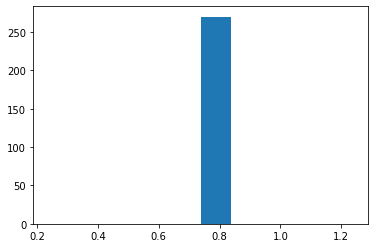

In [23]:
import matplotlib.pyplot as plt

plt.hist(tune_df.Coherence, bins = 10)
plt.show()

# this is so weird, all models generate the same coherence measures

In [21]:
# find the set of parameters that give the highest coherence measures
index = tune_df.Coherence.argmax()
tune_df.iloc[index]

Topics              2
Alpha            0.01
Beta             0.01
Coherence    0.737569
Name: 0, dtype: object

In [26]:
model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word,
                                       num_topics=2, alpha=0.01, eta=0.01)

pprint(model.print_topics())

[(0,
  '0.036*"websupport_login" + 0.027*"websupport_login_request" + '
  '0.026*"big_ip" + 0.014*"big_iq" + 0.013*"virtual_server" + '
  '0.012*"proactive_upgrade" + 0.008*"pool_member" + 0.005*"need_help" + '
  '0.004*"load_balancer" + 0.004*"power_supply"'),
 (1,
  '0.010*"big_ip" + 0.010*"vcmp_guest" + 0.008*"need_assistance" + '
  '0.006*"big_iq" + 0.005*"high_cpu" + 0.005*"release_license" + '
  '0.004*"bug_id" + 0.004*"rma_request" + 0.004*"websupport_login" + '
  '0.004*"health_check"')]


In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import pickle

version = 0

# visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./LDA_results/ldavis_prepared_{}_v{}'.format(num_topics, version))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './LDA_results/ldavis_prepared_{}_v{}.html'.format(num_topics, version))
LDAvis_prepared
                   

In [ ]:
# save model
lda_model.save('best_lda.model')

# load model later
# model = gensim.models.LdaModel.load('lda.model')